# $(T)\ Two\ Body\ Cases$

## NEWTON LIMIT REGIME $\quad m_1 \ll m_2$

In [13]:
%run ./Orbital_Functions.ipynb

### NEWTON LIMIT BOUND

1) Earth-Sun System

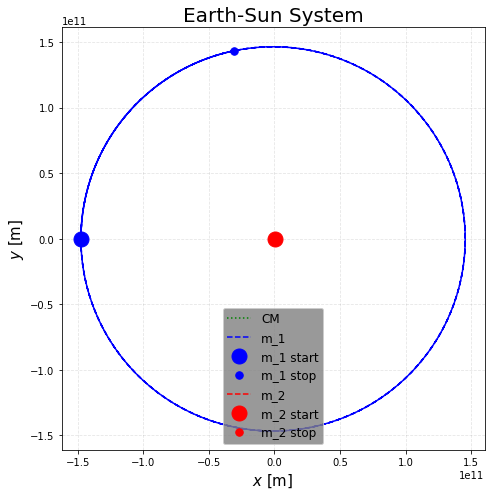

In [15]:
m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-50e6,     0])*R_S
x_2 = np.array([0.,        0])*R_S
v_1 = np.array([0., 9.963e-5])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM = run_model(s, t_max = 1e13*R_S/c, dt = 10e8*R_S/c)
# pos1, pos2, pos_CM = run_model_2(s, t_max = 1e13*R_S/c, dt = 1e8*R_S/c)

orbPlotter(pos1, pos2, pos_CM, CM=True, filename='Earth-Sun System')
# lims = np.array([-2e6, 2.5e6])
# orbPlotter_2(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True)

Eccentricity Check $\ \downarrow$

In [16]:
xmax, xmin, ymax, ymin = findMaxPos(pos1)

b = xmax - xmin
a = ymax - ymin

e = np.sqrt(1 - b**2/a**2)
print(f'a = {a:.3e} meter, b = {b:.3e} meter, e = {e:.3f}')

a = 2.973e+11 meter, b = 2.932e+11 meter, e = 0.166


We get $e_\mathrm{predicted} \approx 0.166$ but we expect a value of $e_\mathrm{expected} \approx 0.017$.

2) Icarus-Sun System

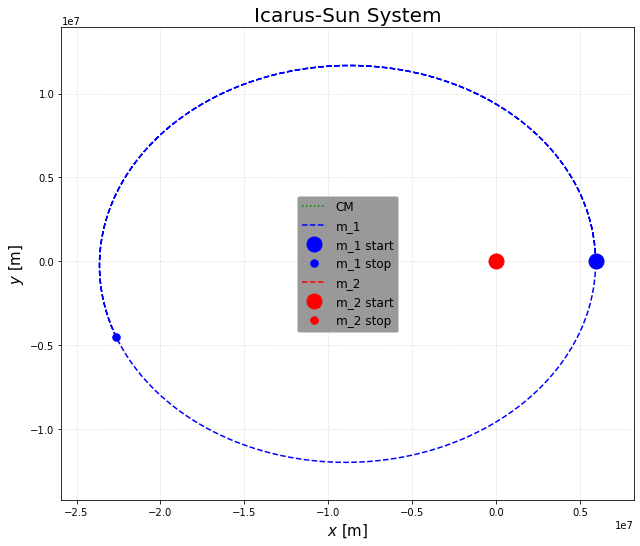

In [4]:
m_1 = 0.001e15
m_2 = M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([1000., 0.])*R_S
x_2 = np.array([-1000.,0.])*R_S
v_1 = np.array([0.,  0.01])*c
v_2 = np.array([0., -0.01])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM = run_model(s, t_max = 5000000*R_S/c, dt = 2000*R_S/c)

orbPlotter(pos1, pos2, pos_CM, CM=True, filename='Icarus-Sun System',figsize=(9,9))

### NEWTON LIMIT SCATTERING

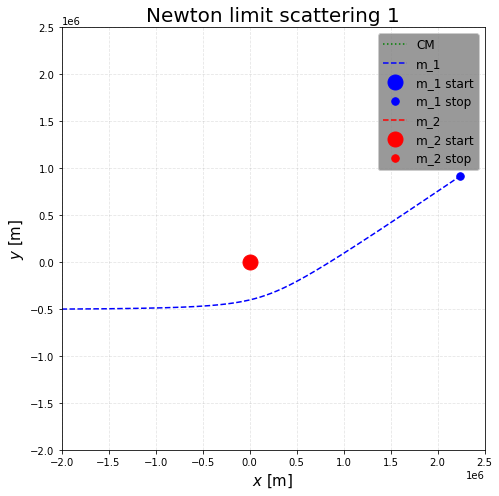

In [17]:
m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -0.5e6])
x_2 = np.array([0.,        0])
v_1 = np.array([0.1,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM = run_model(s, t_max = 17500*R_S/c, dt = 1*R_S/c)

# orbPlotter(pos1, pos2, pos_CM, CM=True, figsize=(10,10))
lims = np.array([-2e6, 2.5e6])
orbPlotter_2(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True, filename='Newton limit scattering 1')

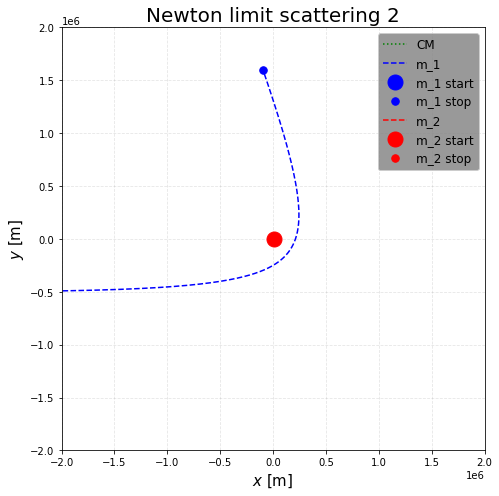

In [18]:
m_1 = 0.003*M_sun
m_2 = 1*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-3e6, -0.5e6])
x_2 = np.array([0.,        0])
v_1 = np.array([0.05,       0])*c
v_2 = np.array([0.,        0])*c
s = x_1, x_2, v_1, v_2, m_1, m_2

pos1, pos2, pos_CM = run_model(s, t_max = 25000*R_S/c, dt = 3*R_S/c)

# orbPlotter(pos1, pos2, pos_CM, CM=True, figsize=(10,10))
lims = np.array([-2e6, 2e6])
orbPlotter_2(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True, filename='Newton limit scattering 2')

# BLACK HOLE REGIME CHECK $\quad m \sim 10M_\mathrm{sun}$

In [7]:
%run ./Orbital_Functions.ipynb

c = const.c.value
G = const.G.value
M_sun = const.M_sun.value



## SYMMETRY TEST

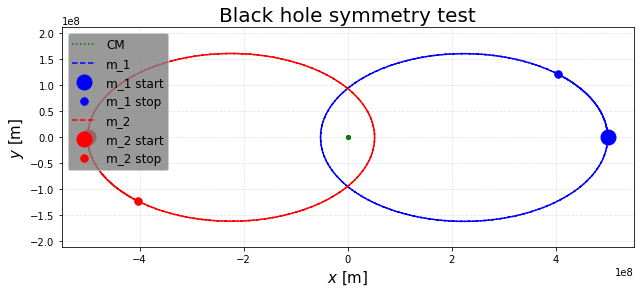

In [8]:
m_1 = M_sun*5
m_2 = M_sun*5

x_1 = np.array([1e9,  0.0])
x_2 = np.array([0.0,  0.0])
v_1 = np.array([0.0,  3e5])
v_2 = np.array([0.0, -2e5])

s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, posCM = run_model(s, t_max = 5e3, dt=0.01, EIH = True)
pos1, pos2, posCM = run_model(s, t_max = 5e3, dt=1)
orbPlotter(pos1, pos2, posCM, CM = True, filename='Black hole symmetry test', figsize=(9,9))



## BOUND CASE

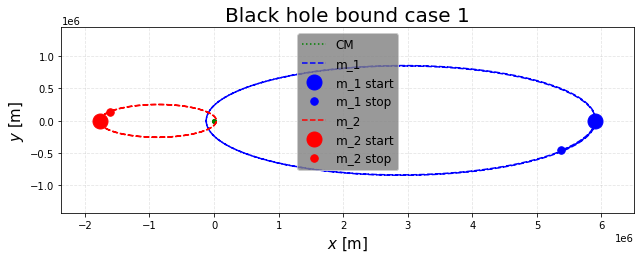

In [9]:
m_1 = 3*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([100.,  0.])*R_S
x_2 = np.array([-100., 0.])*R_S
v_1 = np.array([0,   0.01])*c
v_2 = np.array([0.,  0.02])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c)

orbPlotter(pos1, pos2, pos_CM, CM=True, filename='Black hole bound case 1', figsize=(9,9))

# BLACK HOLE SCATTERING

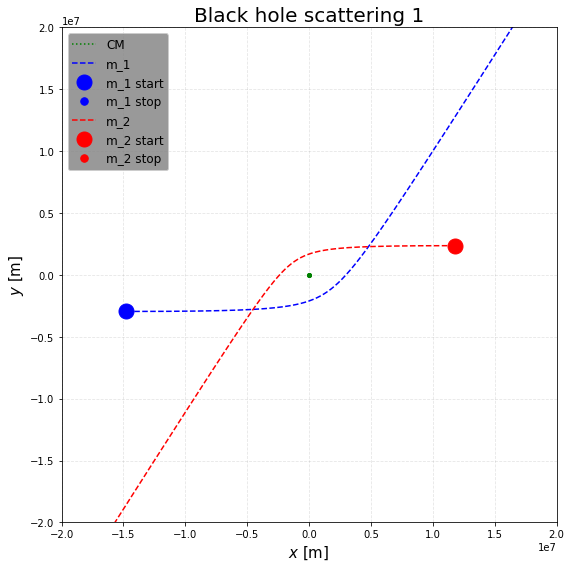

In [10]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-5e2,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.1,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c)

# orbPlotter(pos1, pos2, pos_CM, CM=True)
lims = (-2e7, 2e7)
orbPlotter_2(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True, filename='Black hole scattering 1', figsize=(8,8))

## BLACK HOLE VERY $dt$ DEPENDENT

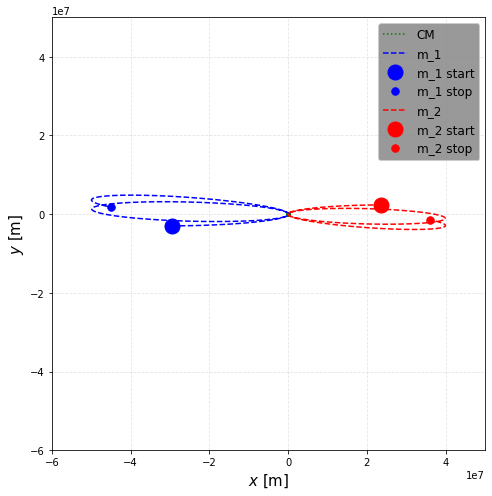

In [11]:
m_1 = 8*M_sun
m_2 = 10*M_sun

R_S = 2*(m_1 + m_2)*G/c**2

x_1 = np.array([-1e3,  0.])*R_S
x_2 = np.array([0.,  100.])*R_S
v_1 = np.array([0.02,   0])*c
v_2 = np.array([0.,     0])*c


s = x_1, x_2, v_1, v_2, m_1, m_2

# pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
pos1, pos2, pos_CM = run_model(s, t_max = 400000*R_S/c, dt = 5*R_S/c)

# orbPlotter(pos1, pos2, pos_CM, CM=True)
lims = (-0.6e8, 0.5e8)
orbPlotter_2(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True)

TAKES 4 MIN TO RUN $\downarrow$

In [12]:
# # pos1, pos2, pos_CM = run_model(s, t_max = 20000*R_S/c, dt = 1*R_S/c, EIH=True, GR=False, DL=False)
# pos1, pos2, pos_CM = run_model(s, t_max = 400000*R_S/c, dt = 0.1*R_S/c)

# # orbPlotter(pos1, pos2, pos_CM, CM=True)
# lims = (-0.6e8, 0.5e8)
# orbPlotter_2(pos1, pos2, pos_CM, xlim=lims, ylim=lims, CM=True)